# The Perceptron Algorithm

In this Jupyter notebook, we will implement the perceptron algorithm written with Julia utilizing the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

We will also implement the following packages: 
* RDatasets [documentation](https://github.com/JuliaStats/RDatasets.jl)
* Plots [documentation](http://docs.juliaplots.org/latest/)

The perceptron algorithm is utilized for the supervised learning of binary classifiers (meaning its task is to classify the elements of a set into two groups on the basis of the classification rule). It is also a single-layer neural network consisting of four main parts: input values, weights and bias, net sum, and an activation function.

![Perceptron](perceptronTheory.png)

For this project, we will only observe sepal length and sepal width in our data to illustrate the prediction of species. Furthermore, the perceptron algorithm can only be used when our data is linearly separable.  

In [83]:
using RDatasets
using Plots
theme(:dark)

# Load the iris dataset from RDatasets package

iris = dataset("datasets", "iris")

# Access the first 100 entries of data. In this notebook we only consider two features per data entry, 
# which are sepal length and sepal width.
x_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]

# Setosa data will be labeled 1, versicolor data will ba labeled -1
y_data = [iris.Species[i] == "setosa" ? 1 : -1 for i = 1:100];

# observing the shorterned iris dataset
first(iris,6)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


The iris dataset contains the following measurements of data: SepalLength, SepalWidth, PetalLength, PetalWidth.
In this project, we will for simplicity only observe SepalLength and SepalWidth; we will take a look at the rest of the combinations at a later time.

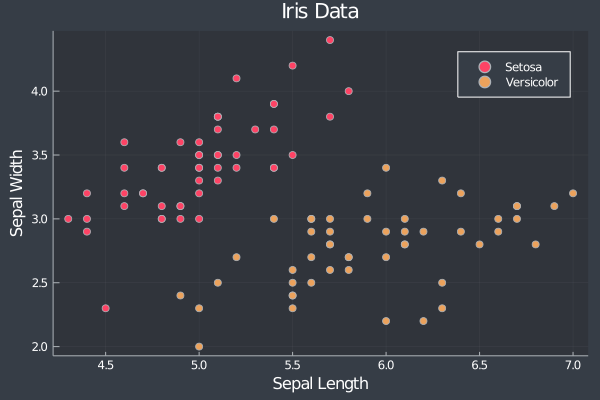

In [59]:
# Visualize the data with the following code. This will confirm that the data is linearly separable

scatter(x_data[1:50], 
        label = "Setosa",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris Data")

scatter!(x_data[51:100],
        label = "Versicolor")

From the plot, we can observe the sepal data for setosa and versicolor are linearly separable. Hence, we can proceed with the perceptron algorithm to determine the flower species using the sepal data.

The activation function below applies a sign rule (convert the numerical output into +1 or -1) to check if the output of the weighting function is greater than zero or not.

In the perceptron learning algorithm, the predicted output is compared with the known output. If it does not match, the error is propagated backward to allow weight adjustment to happen.

![PerceptronUpdateRule](perceptronUpdateRule.jpg)

In [70]:
# Perceptron Activation Function
function sign(weights, x)
    """ 
    Sign function input for the out algorithm. We use this function to determine the sign of the
    dot product between weights and x vector to feed into the out algorithm.
    
    Arguments:
        weights (array): The parameter within a neural network that transforms input data within the network's hidden layers.
                         These are random input based on the size of the x_data vector size
    
        x (tuple):    single tuple of the x_data from the overall dataset
    
    Outputs:
        Returns a value of -1 or 1 depending on the sign of the dot product (negative or positive)
    """
    x̂ = [1.0, x[1], x[2]]
    return weights'x̂ > 0 ? 1 : -1
end

# Perceptron Update Rule
function perceptron_update(weights, x, y)
    """ Function to check output of the sign function to match the sign of y_data. 
        This update function will only update if there is an error, a mismatch of signs, between x_data and y_data.
    
    Args:
        weights (Array):Array of updated weight values to be used in network classification
        x (Tuple):      Tuple input of the data selected one point at a time
        y (Array) :     Array of listed of -1 or 1 that represents the correct classification of data
    
    Output:
        Returns the updated or non-updated weight values
    """
    if sign(weights, x) != y
        weights += y*[1.0, x[1], x[2]]
    end
    return weights
end

# Error Count
function error_count(weights, feature_set, labels)
    """ 
    Function summing an array for the length of the featured set to calcuate the 
    total amount of errors in the feature set. 0 if correct and 1 if wrong classification.
    
    """
    return sum([sign(weights, feature_set[i]) != labels[i] ? 1 : 0 for i = 1:length(feature_set)])
end

error_count (generic function with 1 method)

In [73]:
# Iterate the perceptron update rule by randomly testing entries in the dataset. This
# is equivalent to what we will learn to be stochastic gradient descent.

function perceptron_algorithm(weights, feature_set, labels, ϵ)
    
    """ Perceptron algorithm combining the outputs of the previous functions 
    
    Args:
        weights (Array):     Array of updated weight values to be used in network classification
        feature set (Tuple): Input of all the x_data selected out before    
        labels (Array):      Array of listed of -1 or 1 that represents the correct classifcation of data based on our data
        ϵ (int):             Epslion is the error value that we target for, function will continue until this error value is reached
    
    Output:
        updated weights:     Weights in the algorithm accounted for updating
        Weight Vector:       Listed of updated weight values over each iteration 
        Error measures:      Array of the count of errors each iteration 
    """
    
    # leaving error measures and weight vector arrays empty to avoid typing error from Julia
    
    error_measures = []
    append!(error_measures, error_count(weights, feature_set, labels))
    
    weight_vector = []
    
    while error_count(weights, feature_set, labels) > ϵ
        for i = 1:length(feature_set)
            weights = perceptron_update(weights, feature_set[i],labels[i])
        end
        
        append!(weight_vector, weights)
        append!(error_measures, error_count(weights, feature_set, labels))
    end
    
    return weights, weight_vector, error_measures
end

perceptron_algorithm (generic function with 1 method)

In [93]:
# check if the perceptron algorithm works for 3 random data tuples until 0 misclassification
w, W, errors = perceptron_algorithm(randn(3), x_data, y_data, 0)

([127.325, -79.9255, 101.423], Any[-2.67516, -5.62549, -2.9774, -1.67516, -2.62549, 0.322597, -1.67516, -4.52549, 0.622597, -1.67516  …  99.1226, 126.325, -84.5255, 98.4226, 126.325, -84.9255, 98.4226, 127.325, -79.9255, 101.423], Any[50, 50, 50, 50, 50, 50, 50, 50, 50, 50  …  1, 1, 1, 1, 1, 1, 1, 2, 2, 0])

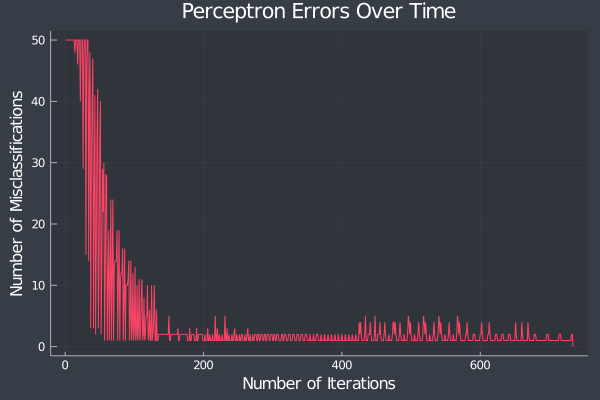

In [94]:
plot(errors,
    title = "Perceptron Errors Over Time",
    legend = false,
    xaxis = "Number of Iterations",
    yaxis = "Number of Misclassifications")

# it takes around 700 iterations for the perceptron to get down to 0 misclassification for this dataset

We are looking at the ${sign}(w^{T}x)$, so when we look at the product of those two, we get the following:

$$ x_3 = w_1x_1 + w_2x_2 + w_3 $$

Which is defining a hyperplane in 3-dimensional space. The 3-dimensional space is cut at the x,y axis when we set $z = 0$.

Therefore, setting $ x_3 = 0 $ to solve for $ x_2 $, we arrive at the following line in 2-dimensional space:

$$ x_2 = \frac{-x_1w_1-w_3}{w_2} $$

This line will be plotted below to show that our data has successfully been split into two groups.

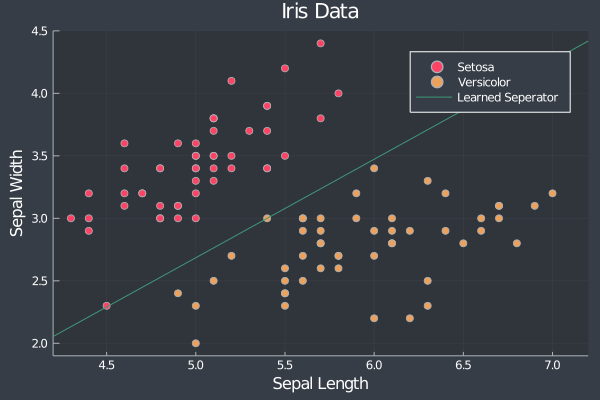

In [95]:
# Overlay the line created by the weights we have formed onto the plot of the iris data
scatter(X_data[1:50], 
        label = "Setosa",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris Data")

scatter!(X_data[51:100],
        label = "Versicolor")

plot!(x -> (-w[1]-w[2]*x)/w[3], 
    label = "Learned Seperator", 
    xlims = (4.2,7.2), 
    ylims = (1.90,4.5))


# Conclusion

In this project/notebook, we introduced the perceptron learning algorithm as well as utilizing it to classify species in the iris dataset according to sepal length and sepal width. We can further use this same technique to verify efficiency in this method using the same dataset although with differing parameters.